In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [236]:
DATA_PATH = './Data/'

TRAIN_DATA_PATH = DATA_PATH + 'train.csv'
TEST_DATA_PATH = DATA_PATH + 'test.csv'
SUBMISSION_DATA_PATH = DATA_PATH + 'sample_submission.csv'

In [237]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)
submission_df = pd.read_csv(SUBMISSION_DATA_PATH)

train_df.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [238]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [239]:
def show_graph(col):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=train_df[f'{col}'].value_counts().index, 
                y=train_df[f'{col}'].value_counts().values, 
                palette='Set3', 
                ax=ax)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\4183445985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df[f'{col}'].value_counts().index,


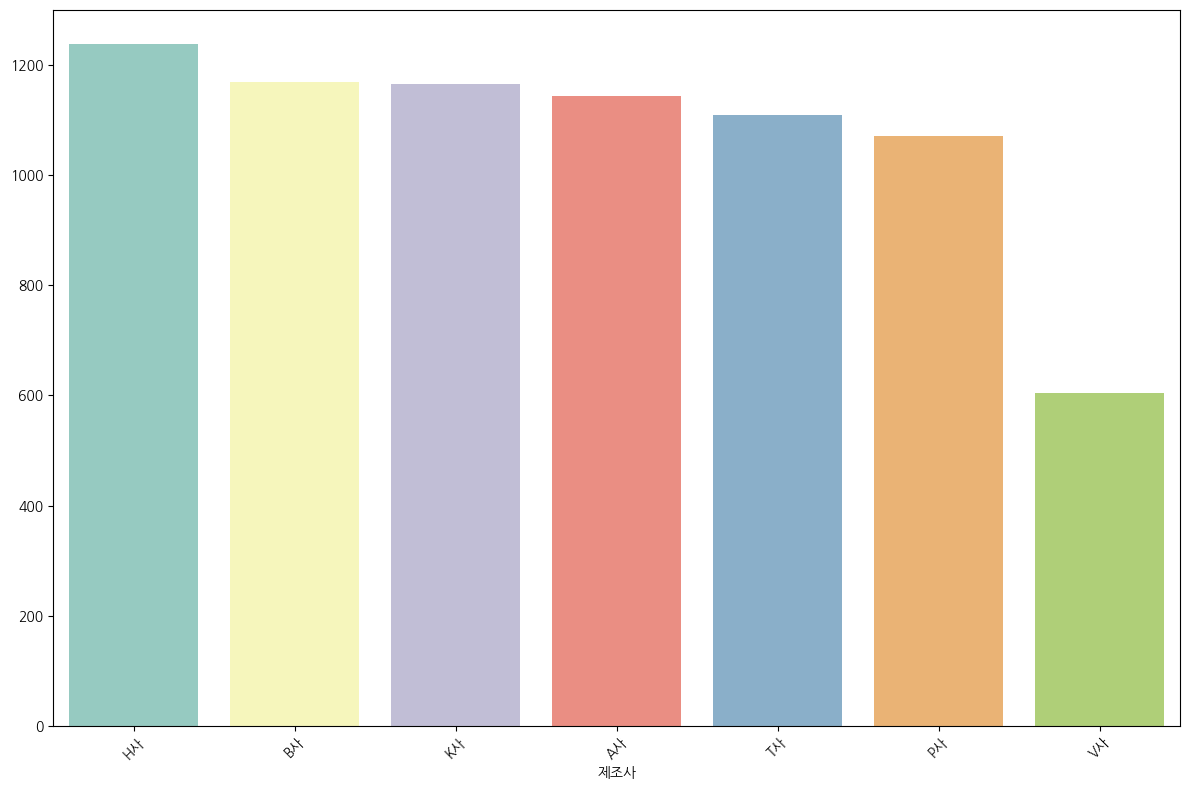

In [240]:
show_graph('제조사')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\4183445985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df[f'{col}'].value_counts().index,


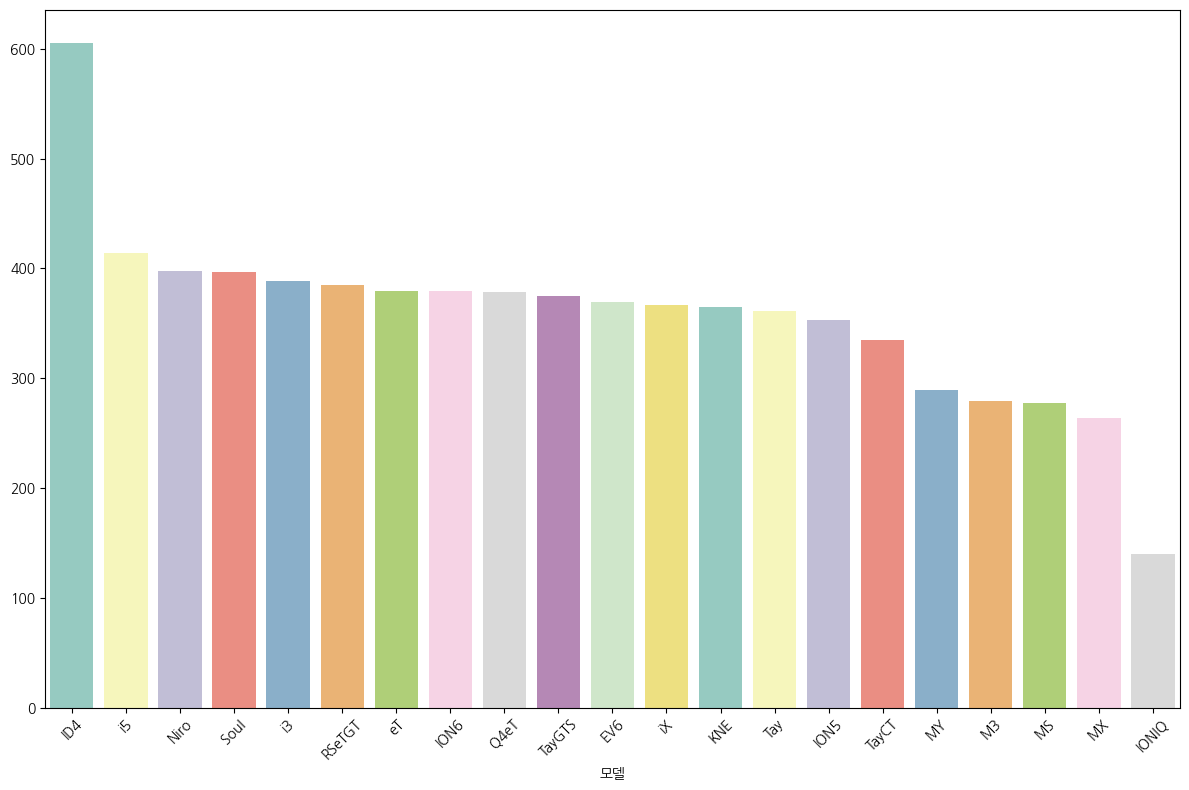

In [241]:
show_graph('모델')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\4183445985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df[f'{col}'].value_counts().index,


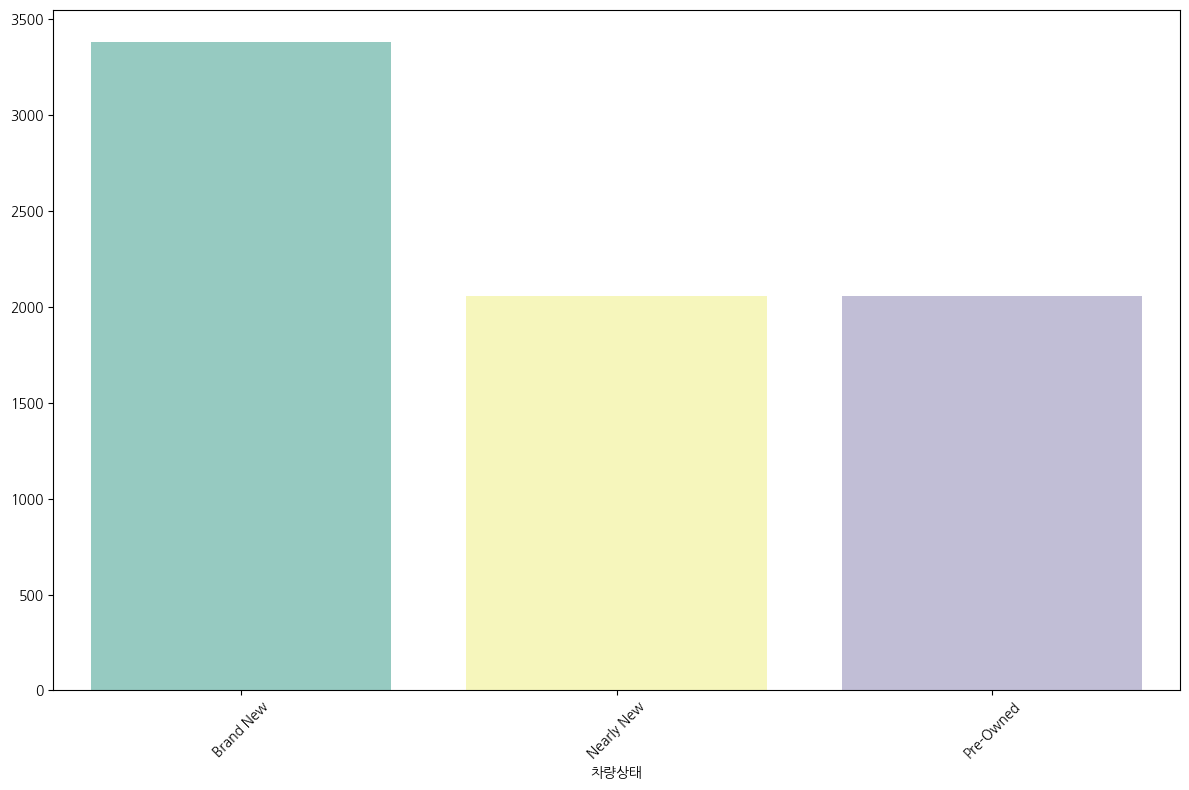

In [242]:
show_graph('차량상태')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\4183445985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df[f'{col}'].value_counts().index,


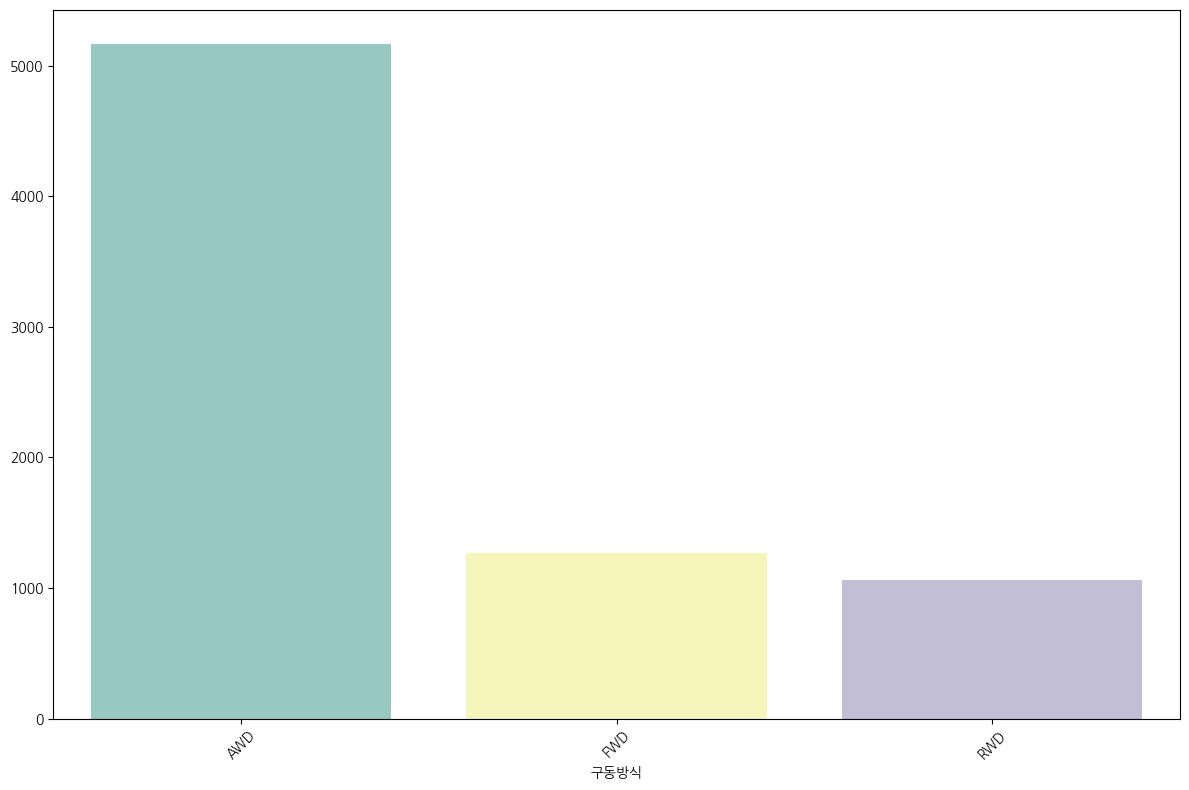

In [243]:
show_graph('구동방식')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\4183445985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df[f'{col}'].value_counts().index,


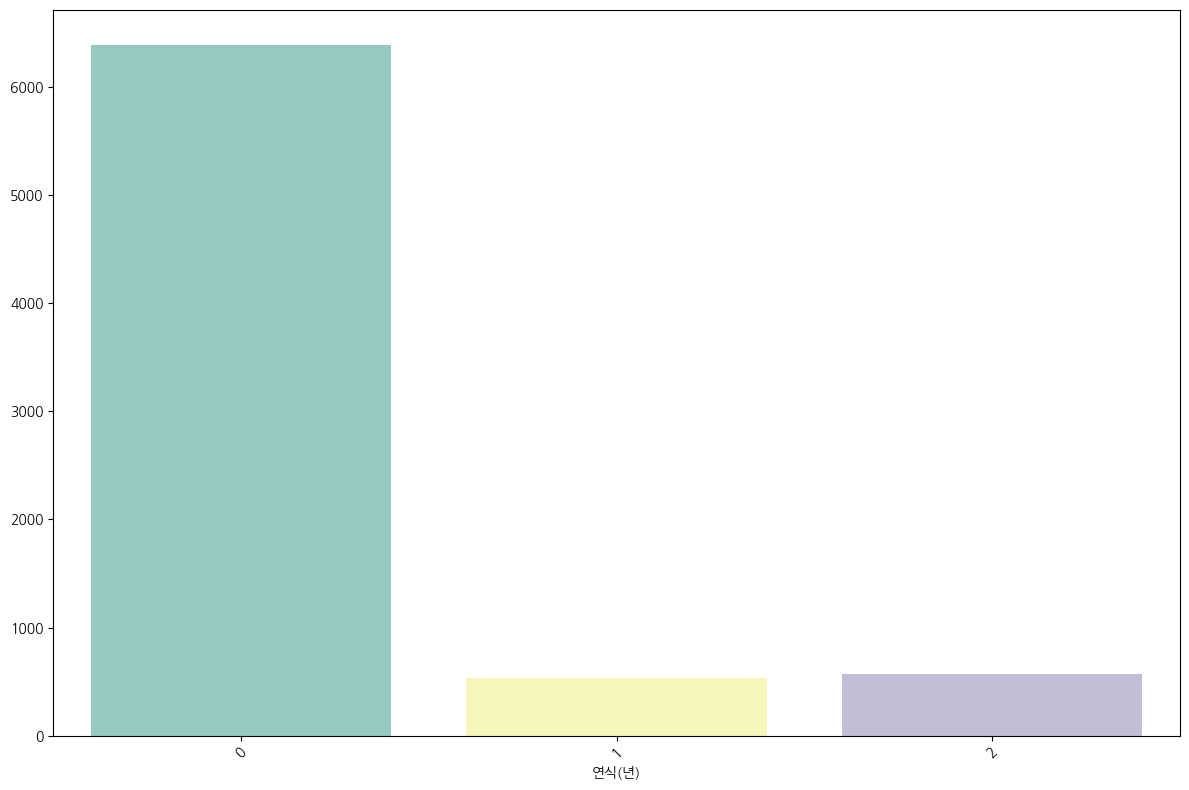

In [244]:
show_graph('연식(년)')

In [245]:
def print_mean_battery(col):
    for i in train_df[col].unique():
        print(f"{col} - {i} : {train_df[train_df[col] == i]['배터리용량'].mean()}")

In [246]:
print_mean_battery('연식(년)')

연식(년) - 2 : 69.538296
연식(년) - 0 : 69.68484126984127
연식(년) - 1 : 66.74253498871332


In [247]:
print_mean_battery('모델')

모델 - TayGTS : 80.45416988416989
모델 - Niro : 54.578933333333325
모델 - eT : 83.77656402439024
모델 - RSeTGT : 84.39925242718446
모델 - i5 : 65.49336119402984
모델 - ION6 : 65.87692340425532
모델 - MS : 89.67221266968326
모델 - MY : 63.91637988826815
모델 - Q4eT : 69.0407149122807
모델 - ID4 : 65.42444
모델 - TayCT : 77.5639326923077
모델 - Soul : 53.71446036585366
모델 - iX : 90.0
모델 - MX : 90.03115121951218
모델 - IONIQ : 62.04435185185184
모델 - EV6 : 90.0
모델 - KNE : 72.11759670781893
모델 - M3 : 64.48288165680474
모델 - i3 : 52.691131498470945
모델 - ION5 : 66.43954545454545
모델 - Tay : 67.16731555555556


In [248]:
print_mean_battery('보증기간(년)')

보증기간(년) - 0 : 59.936046931407944
보증기간(년) - 6 : 68.75179527559055
보증기간(년) - 7 : 83.86369625246549
보증기간(년) - 3 : 61.30074884792627
보증기간(년) - 1 : 59.83024901185771
보증기간(년) - 5 : 64.60444846796658
보증기간(년) - 8 : 84.68549800796812
보증기간(년) - 10 : 90.0
보증기간(년) - 2 : 68.24809410548086
보증기간(년) - 4 : 61.65939722222222
보증기간(년) - 9 : 90.0


In [249]:
print_mean_battery('차량상태')

차량상태 - Nearly New : 66.67888807649044
차량상태 - Brand New : 92.5865671641791
차량상태 - Pre-Owned : 59.053240185950415


In [250]:
print_mean_battery('제조사')

제조사 - P사 : 75.26528034682082
제조사 - K사 : 57.49066711590296
제조사 - A사 : 78.77559787556905
제조사 - B사 : 62.34454742547425
제조사 - H사 : 67.39844044665013
제조사 - T사 : 78.31083204134367
제조사 - V사 : 65.42444


In [251]:
train_df.groupby('연식(년)')['배터리용량'].mean()

연식(년)
0    69.684841
1    66.742535
2    69.538296
Name: 배터리용량, dtype: float64

In [252]:
def draw_mean_battery(col):
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.barplot(x = sorted(train_df[col].unique()),
                y = train_df.groupby(col)['배터리용량'].mean(),
                palette = 'tab20c',
                ax = ax)
    plt.xticks(rotation = 45, size = 20)
    plt.yticks(size = 15)
    plt.title(f'{col} - 평균 배터리', size = 20)
    ax.set_ylabel('배터리 용량 (평균)', fontsize = 20)
    plt.tight_layout()
    plt.show()

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\834823150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(train_df[col].unique()),


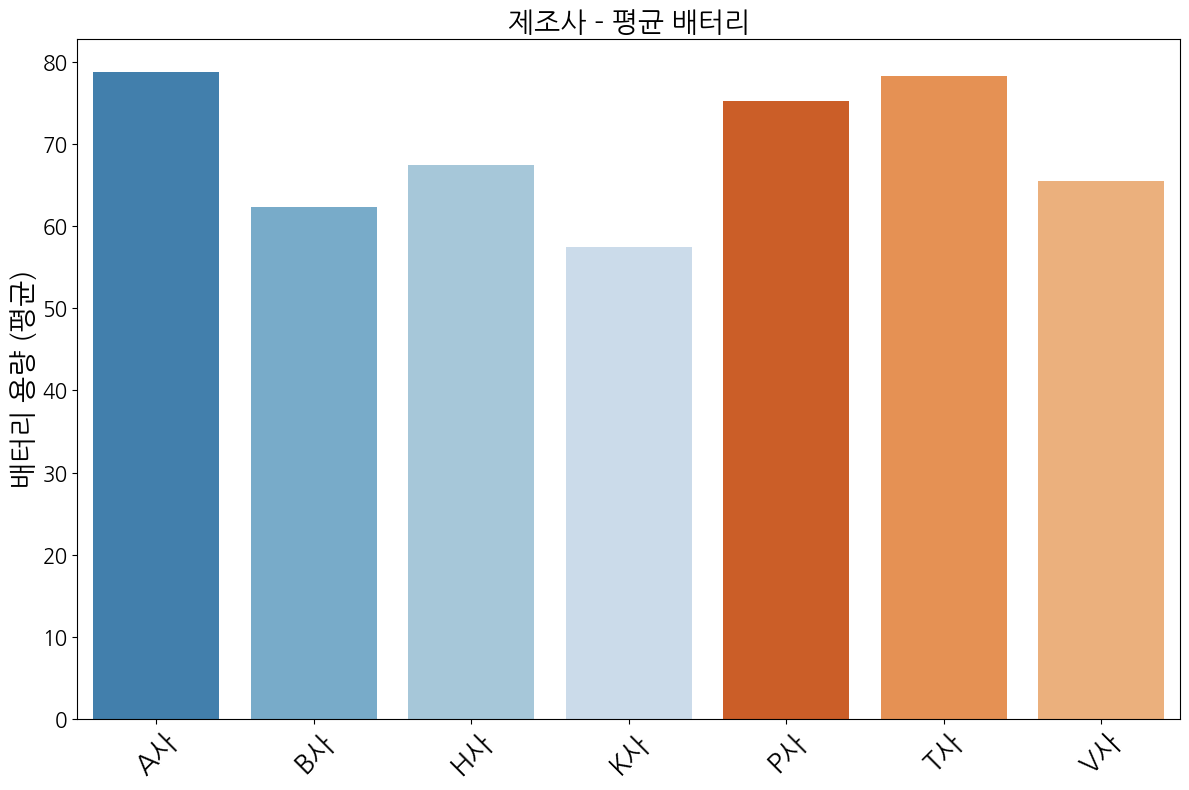

In [253]:
draw_mean_battery('제조사')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\834823150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(train_df[col].unique()),


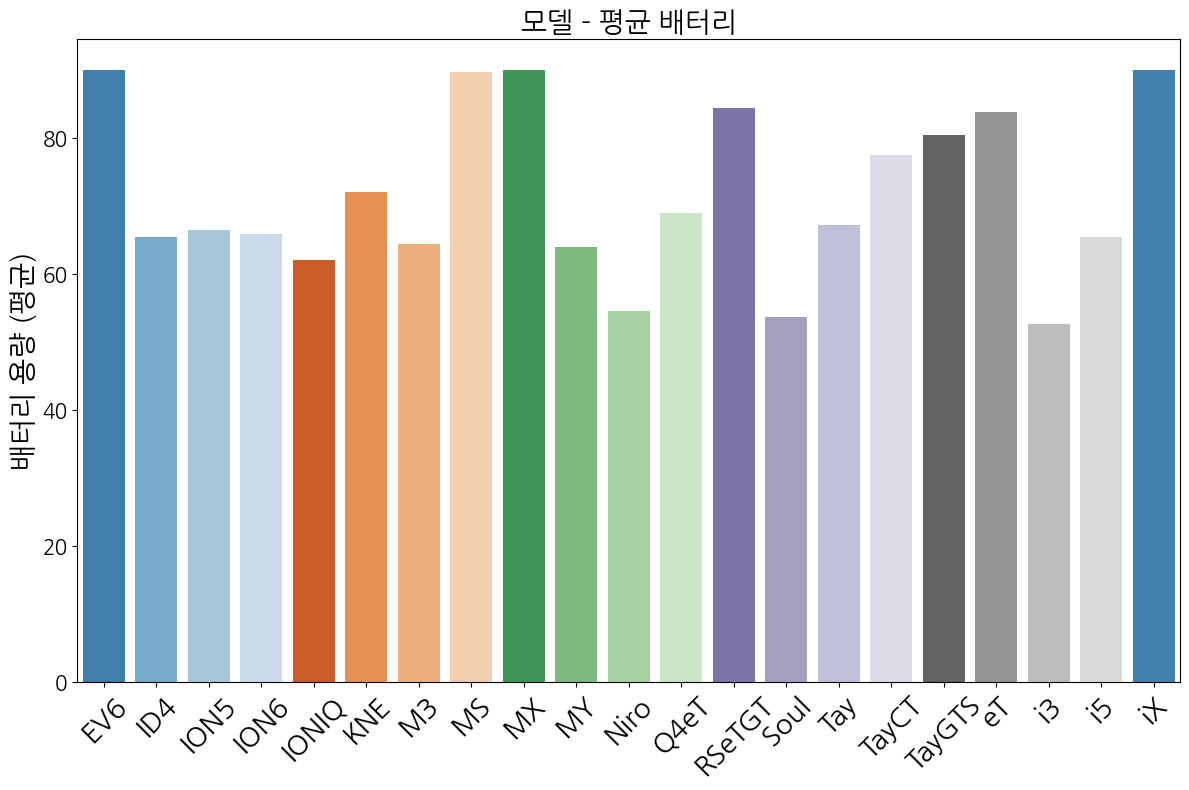

In [254]:
draw_mean_battery('모델')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\834823150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(train_df[col].unique()),


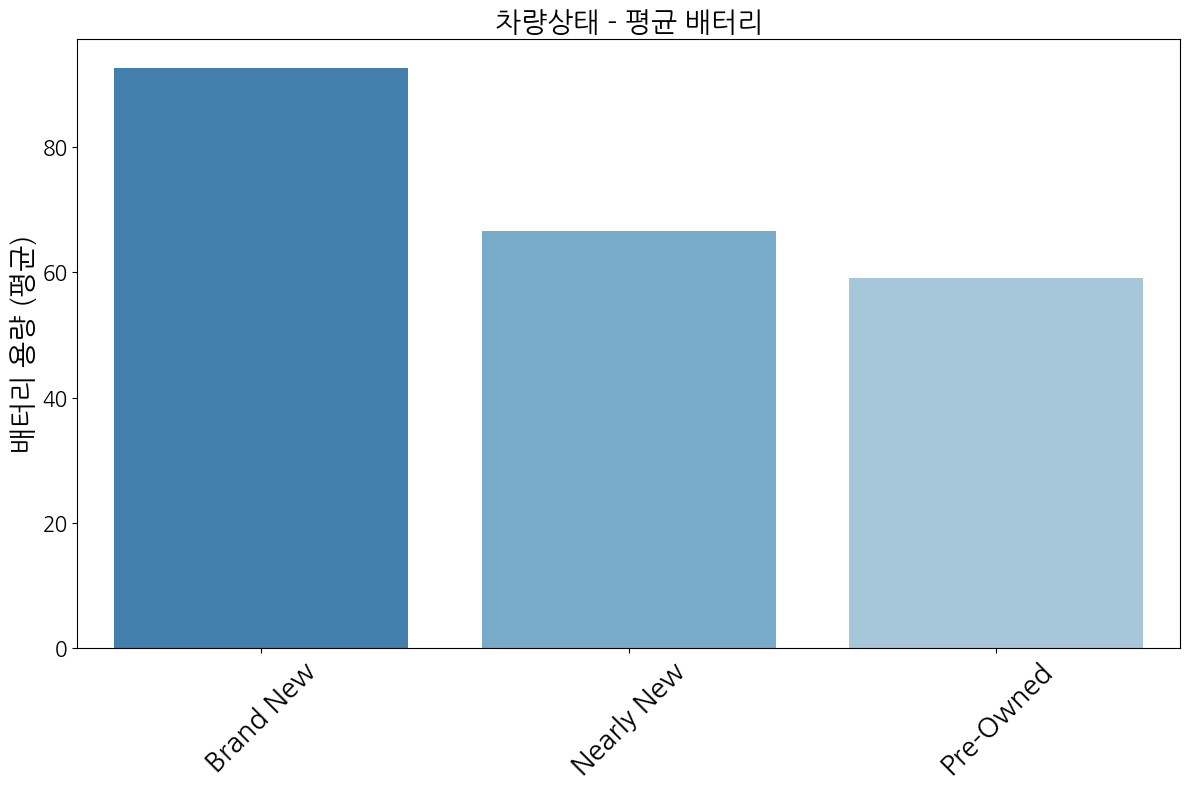

In [255]:
draw_mean_battery('차량상태')

C:\Users\이민하\AppData\Local\Temp\ipykernel_19464\834823150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(train_df[col].unique()),


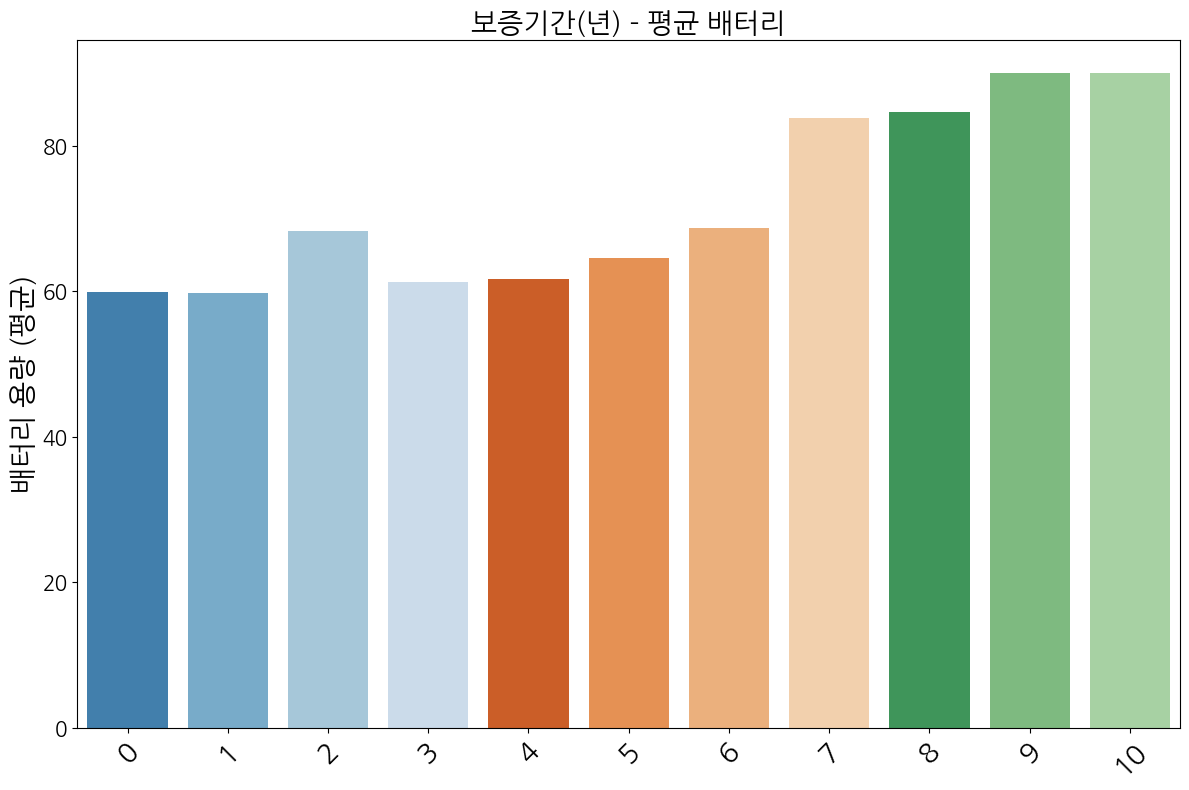

In [256]:
draw_mean_battery('보증기간(년)')

In [257]:
train_df.corr(numeric_only = True)

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


모델, 보증기간 7년 이상, 차량 상태가 배터리 용량을 결정

In [258]:
train_df[train_df['배터리용량'].isna()]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
6,TRAIN_0006,T사,MS,Nearly New,NaN,AWD,19395,3,No,0,83.42
8,TRAIN_0008,T사,MY,Brand New,NaN,AWD,2226,8,No,0,74.06
9,TRAIN_0009,A사,Q4eT,Brand New,NaN,AWD,3683,7,No,0,59.66
11,TRAIN_0011,V사,ID4,Brand New,NaN,AWD,1131,8,No,0,40.50
...,...,...,...,...,...,...,...,...,...,...,...
7489,TRAIN_7489,H사,ION5,Brand New,NaN,AWD,8871,9,No,0,35.83
7490,TRAIN_7490,A사,Q4eT,Brand New,NaN,AWD,5794,7,No,0,59.95
7491,TRAIN_7491,K사,Soul,Brand New,NaN,FWD,5966,10,No,0,16.75
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95


In [259]:
train_df['보증기간(년)'] = train_df['보증기간(년)'].apply(lambda x: 'high' if x >= 7 else 'low')
test_df['보증기간(년)'] = test_df['보증기간(년)'].apply(lambda x: 'high' if x >= 7 else 'low')

In [260]:
def fill_battery(cond_df, df):
    for i in range(len(cond_df)):
        model = cond_df.iloc[i]['모델']
        status = cond_df.iloc[i]['차량상태']
        warranty = cond_df.iloc[i]['보증기간(년)']
        
        cond = (train_df['모델'] == model) & (train_df['차량상태'] == status) & (train_df['보증기간(년)'] == warranty)       
        df.loc[cond_df.iloc[i].name, '배터리용량'] = train_df[cond]['배터리용량'].mean()

In [261]:
fill_battery(train_df[train_df['배터리용량'].isna()], train_df)
fill_battery(test_df[test_df['배터리용량'].isna()], test_df)

In [262]:
train_df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,low,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,low,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,high,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,78.227,AWD,21683,low,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,low,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,90.000,AWD,3773,high,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,low,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,90.000,AWD,1363,low,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,low,No,2,24.00


In [263]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     7497 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   object 
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 644.4+ KB


In [264]:
test_df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,low,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,high,No,0
2,TEST_002,B사,i5,Brand New,90.000,RWD,7197,high,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,high,No,1
4,TEST_004,K사,EV6,Brand New,90.000,FWD,7597,high,No,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,low,No,0
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,low,No,0
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,low,No,0
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,low,No,0


In [265]:
encoder = LabelEncoder()

object_list = ['제조사', '모델', '차량상태', '구동방식', '보증기간(년)', '사고이력']

for col in object_list:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.fit_transform(test_df[col])

In [266]:
train_df.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,4,16,1,86.077,0,13642,1,0,2,159.66
1,TRAIN_0001,3,10,1,56.000,1,10199,1,0,0,28.01
2,TRAIN_0002,0,17,0,91.200,0,2361,0,0,0,66.27
3,TRAIN_0003,0,12,1,78.227,0,21683,1,0,0,99.16
4,TRAIN_0004,1,19,2,61.018,0,178205,1,0,0,62.02


In [267]:
test_df.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,4,15,1,76.093,0,14057,1,0,0
1,TEST_001,1,20,0,90.000,0,7547,0,0,0
2,TEST_002,1,19,0,90.000,2,7197,0,1,0
3,TEST_003,2,2,1,68.479,0,10357,0,0,1
4,TEST_004,3,0,0,90.000,1,7597,0,0,0


In [268]:
train_df.drop('ID', axis = 1, inplace = True)
test_df.drop('ID', axis = 1, inplace = True)

In [269]:
target = train_df['가격(백만원)']
feature = train_df.drop('가격(백만원)', axis = 1)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [271]:
xgb_model = xgb.XGBRegressor(random_state = 42)

params = {
    'n_estimators' : [50, 100, 200, 300, 500, 1000, 2000],
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1],
    'max_depth' : [3, 5, 7, 9, 12, 15],
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8, 0.9, 1.0],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [272]:
searchCV = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = params,
    n_iter = 1000,
    scoring = 'neg_mean_absolute_error',
    cv = 5,
    verbose = 3,
    random_state = 42
)

searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.005, max_depth=3, n_estimators=300, subsample=0.9;, score=-10.117 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.005, max_depth=3, n_estimators=300, subsample=0.9;, score=-9.735 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.005, max_depth=3, n_estimators=300, subsample=0.9;, score=-9.636 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.005, max_depth=3, n_estimators=300, subsample=0.9;, score=-9.634 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.005, max_depth=3, n_estimators=300, subsample=0.9;, score=-9.856 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.8;, score=-1.226 total time=   1.5s
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.1

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=1000,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9, 12, 15],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=3)

In [275]:
best_model = searchCV.best_estimator_

y_pred = best_model.predict(X_test)

mse_loss = mean_squared_error(y_pred, y_test)
rmse_loss = mse_loss ** 0.5
print(f'MSE loss : {rmse_loss:.2f}')

MSE loss : 2.05


In [276]:
test_pred = best_model.predict(test_df)
print(test_pred)

submission_df['가격(백만원)'] = test_pred

submission_df.to_csv(DATA_PATH + 'submission.csv', index = False)

[130.5088    79.88908   64.84758   35.029934  41.91058  102.85184
  23.17026   36.52204   81.32663   23.224688  69.34338   62.55764
  40.214306 100.262314  90.663475  22.947094 126.1691    52.443893
  60.006718  34.855286  37.796066 159.8093    51.282085  55.77923
  22.799162  43.543438  79.21934   79.9267    27.947556 126.23641
  69.08447   43.72464  114.634544  88.17935   35.880405  79.862656
  24.288229  36.947422  23.420235 120.88507  127.38409   21.352177
 119.60027   60.711487  22.781172 100.078804  23.224688  74.096504
  62.910484  77.53992   35.54916   16.151     38.78573  126.50788
  23.699068  27.947607 155.99019   41.110504 159.89899   40.214306
  55.744648 124.648636  47.922035 120.8268    40.143463  34.12049
  72.356476  50.572002 100.11191   23.106705  44.831676  27.947607
  64.12446   39.107437 124.83039   22.790588  41.108635 120.942116
 160.19987   80.04771   27.51886   40.98694   19.38161   34.12049
  36.351948  36.726353  57.405926  88.26016   64.80233   53.701527
  